In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import scipy.linalg as slg

In [2]:
x=np.linspace(-1,1,3)
y=np.arange(1,-2,-1)
z=np.linspace(1,1000,1000)
Y,Z,X=np.meshgrid(y,z,x)

In [3]:
y

array([ 1,  0, -1])

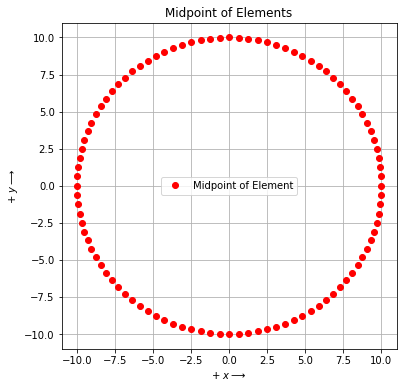

In [4]:
rad = 10
N = 100
midpt_angles = np.linspace(0,2*np.pi,N+1)[:-1]
x_c = rad*np.cos(midpt_angles)
y_c = rad*np.sin(midpt_angles)
pts = np.vstack((x_c,y_c)).T
fig,ax = plt.subplots(figsize=(6,6))
plt.xlabel(r'+ $x\longrightarrow$')
plt.ylabel(r'+ $y\longrightarrow$')
plt.plot(pts[:,0],pts[:,1],'ro',label = 'Midpoint of Element')
plt.legend()
plt.title('Midpoint of Elements')
plt.grid()

In [5]:
def current_spatial(x,y):
    return np.array([-1e7*x*y/(x**2 + y**2),1e7*x**2/(x**2 + y**2)])

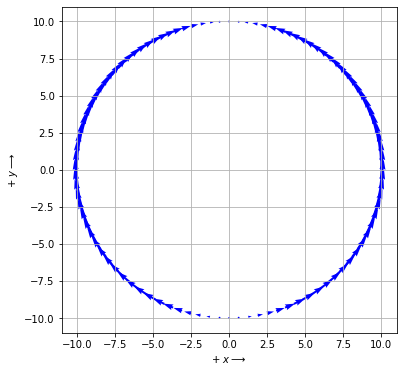

In [6]:
I = current_spatial(pts[:,0],pts[:,1])
dl = 2*np.pi*rad/N
fig,ax = plt.subplots(figsize=(6,6))
ax.quiver(pts[:,0],pts[:,1],I[0]*dl,I[1]*dl,color='b')
plt.xlabel(r'+ $x\longrightarrow$')
plt.ylabel(r'+ $y\longrightarrow$')
plt.grid()

In [7]:
plt.quiver?

In [8]:
dl_vec = dl*np.vstack((-y_c/np.sqrt(x_c**2 + y_c**2),x_c/np.sqrt(x_c**2 + y_c**2))).T

In [9]:
np.exp(-1j*0.1*distance[0,0,0])

NameError: name 'distance' is not defined

In [ ]:
l=0
coords = pts[l]
xl = coords[0]
yl = coords[1]
x_diff = X - xl
y_diff = Y - yl
distance = np.sqrt(x_diff**2 + y_diff**2 + Z**2)
distance = distance.reshape((1000,3,3,1))
#xl*np.exp(-1j*0.1*distance)*dl_vec[l]/distance/np.sqrt(xl**2 + yl**2)
distance[0]

In [68]:
def calc(l):
    coords = pts[l]
    xl = coords[0]
    yl = coords[1]
    x_diff = X - xl
    y_diff = Y - yl
    distance = np.sqrt(x_diff**2 + y_diff**2 + Z**2)
    distance = distance.reshape((1000,3,3,1))
    return xl*np.exp(-1j*0.1*distance)*dl_vec[l]/distance/np.sqrt(xl**2 + yl**2)

In [69]:
calc(0).shape

(1000, 3, 3, 2)

In [70]:
A = 0
for l in range(N):
    A += calc(l)

(1000, 2)

In [72]:
A_lol = np.zeros((100,1000,3,3,2),dtype= complex)
for l in range(N):
    A_lol[l] = calc(l)
A_net = np.sum(A_lol,axis=1)

In [73]:
A.shape

(1000, 3, 3, 2)

In [12]:
B = (A[:,1,2,1] - A[:,1,0,1] + A[:,2,1,0] - A[:,0,1,0])/4

In [ ]:
max(abs(B))

In [ ]:
y[2]

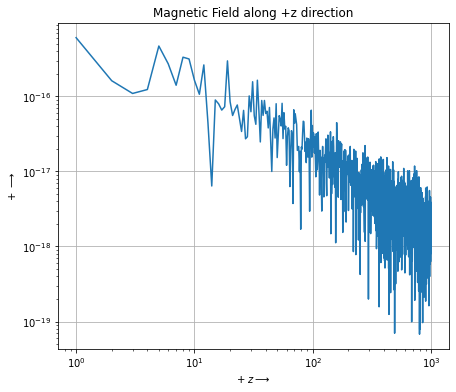

In [13]:
fig,ax = plt.subplots(figsize=(7,6))
plt.loglog(z,np.abs(B))
plt.xlabel(r'+ $z\longrightarrow$')
plt.ylabel(r'+ $\longrightarrow$')
plt.title('Magnetic Field along +z direction')
plt.grid()

In [14]:
C = np.log(np.abs(B))
A = np.c_[np.ones(1000),np.log(z)]
params = slg.lstsq(A,C)[0]

In [16]:
slg.lstsq(A,C)

(array([-34.1084502 ,  -0.99065435]),
 676.0054351824841,
 2,
 array([192.08626178,   5.12774901]))

In [17]:
slg.lstsq?

In [15]:
c = np.exp(params[0])
b = params[1]
print('b is ',b)
print('c is ',c)

b is  -0.9906543530235855
c is  1.5377590439683886e-15


In [33]:
B_est = c*z**b

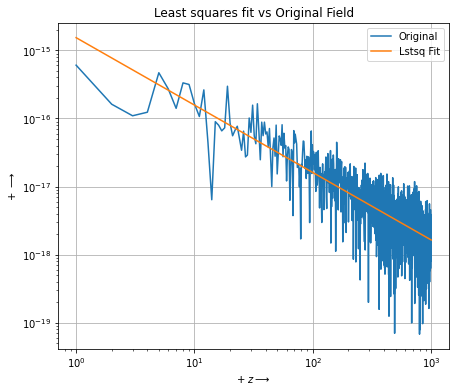

In [53]:
fig,ax = plt.subplots(figsize=(7,6))
plt.loglog(z,np.abs(B),label='Original')
plt.plot(z,B_est,label='Lstsq Fit')
plt.xlabel(r'+ $z\longrightarrow$')
plt.ylabel(r'+ $\longrightarrow$')
plt.title('Least squares fit vs Original Field')
plt.legend()
plt.grid()

# Overly vectorized part

In [ ]:
Rijk = np.array([X,Y,Z])
Rijk_1 = Rijk.reshape((1,3,1000,3,3))
Rijk_100 = np.tile(Rijk_,(100,1,1,1,1))
Rl = np.hstack((pts,np.zeros((100,1))))
Rl_100 = Rl.reshape((100,3,1,1,1))

In [ ]:
vec_diff = Rijk_100 - Rl_100

In [ ]:
lol = np.linalg.norm(vec_diff,axis=1)

In [ ]:
lol.shape

In [ ]:
vec_diff.shape

In [ ]:
dl_vec[0].shape